In [1]:
pip install tensorflow

     -------------------------------------- 272.8/272.8 MB 6.3 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 10.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ------------------------------------- 440.7/440.7 kB 13.9 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 7.3 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 11.0 MB/s eta 0:00:00
     --------------------------------------- 14.7/14.7 MB 10.9 MB/s eta 0:00:00
     ---------------------------------------- 4.1/4.1 MB 10.9 MB/s eta 0:00:00
     --------------------------------------- 24.4/24.4 MB 10.9 MB/s eta 0:00:00
     ----------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.23.5 which is incompatible.


In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [5]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [6]:
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adadelta(), metrics=['accuracy'])

In [7]:
model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 51s 108ms/step - loss: 2.2959 - accuracy: 0.1238 - val_loss: 2.2709 - val_accuracy: 0.3344
Epoch 2/10
469/469 [==============================] - 51s 109ms/step - loss: 2.2548 - accuracy: 0.2396 - val_loss: 2.2219 - val_accuracy: 0.5236
Epoch 3/10
469/469 [==============================] - 49s 103ms/step - loss: 2.2030 - accuracy: 0.3480 - val_loss: 2.1567 - val_accuracy: 0.6041
Epoch 4/10
469/469 [==============================] - 48s 103ms/step - loss: 2.1316 - accuracy: 0.4323 - val_loss: 2.0644 - val_accuracy: 0.6607
Epoch 5/10
469/469 [==============================] - 49s 105ms/step - loss: 2.0324 - accuracy: 0.4879 - val_loss: 1.9332 - val_accuracy: 0.7026
Epoch 6/10
469/469 [==============================] - 49s 105ms/step - loss: 1.8939 - accuracy: 0.5376 - val_loss: 1.7543 - val_accuracy: 0.7342
Epoch 7/10
469/469 [==============================] - 52s 110ms/step - loss: 1.7226 - accuracy: 0.5727 - val_loss: 1.5406 - val_ac

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9827800989151001
Test accuracy: 0.8068000078201294


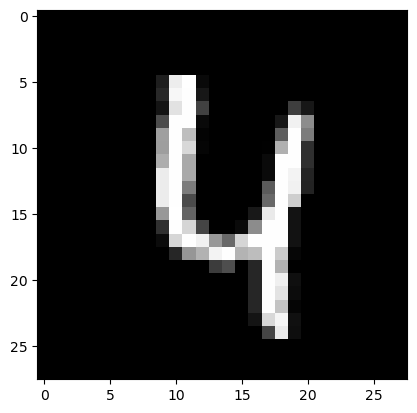

1/1 [==============================] - 0s 66ms/step
Predicted class: 4


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Choose a random image from the test set
img_index = np.random.randint(0, x_test.shape[0])
img = x_test[img_index]

# Display the image
plt.imshow(img.reshape(28, 28), cmap='gray')
plt.show()

# Predict the class of the image
img = np.expand_dims(img, axis=0)  # Expand dimensions for the model
prediction = model.predict(img)

# Print the predicted class
print("Predicted class:", np.argmax(prediction))

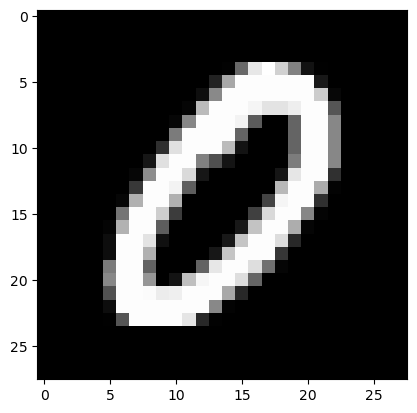

1/1 [==============================] - 0s 17ms/step
Predicted class: 0


In [10]:
# Choose a random image from the test set
img_index = np.random.randint(0, x_test.shape[0])
img = x_test[img_index]

# Display the image
plt.imshow(img.reshape(28, 28), cmap='gray')
plt.show()

# Predict the class of the image
img = np.expand_dims(img, axis=0)  # Expand dimensions for the model
prediction = model.predict(img)

# Print the predicted class
print("Predicted class:", np.argmax(prediction))

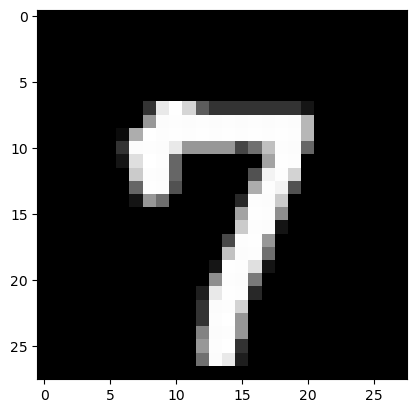

1/1 [==============================] - 0s 19ms/step
Predicted class: 7


In [11]:
# Choose a random image from the test set
img_index = np.random.randint(0, x_test.shape[0])
img = x_test[img_index]

# Display the image
plt.imshow(img.reshape(28, 28), cmap='gray')
plt.show()

# Predict the class of the image
img = np.expand_dims(img, axis=0)  # Expand dimensions for the model
prediction = model.predict(img)

# Print the predicted class
print("Predicted class:", np.argmax(prediction))

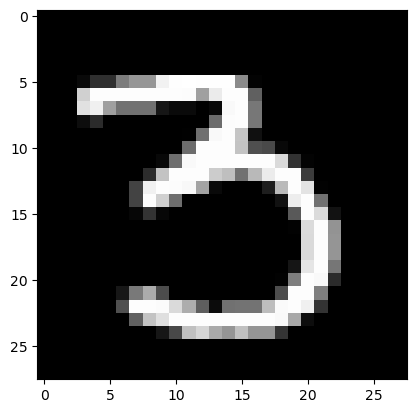

1/1 [==============================] - 0s 19ms/step
Predicted class: 3


In [12]:
# Choose a random image from the test set
img_index = np.random.randint(0, x_test.shape[0])
img = x_test[img_index]

# Display the image
plt.imshow(img.reshape(28, 28), cmap='gray')
plt.show()

# Predict the class of the image
img = np.expand_dims(img, axis=0)  # Expand dimensions for the model
prediction = model.predict(img)

# Print the predicted class
print("Predicted class:", np.argmax(prediction))

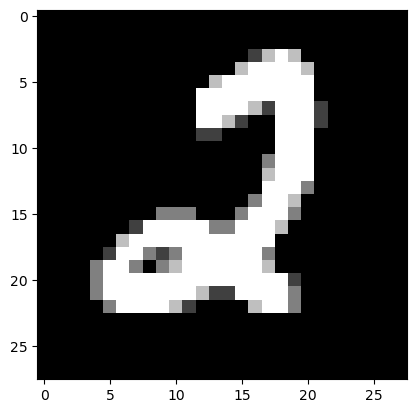

1/1 [==============================] - 0s 26ms/step
Predicted class: 2


In [13]:
# Choose a random image from the test set
img_index = np.random.randint(0, x_test.shape[0])
img = x_test[img_index]

# Display the image
plt.imshow(img.reshape(28, 28), cmap='gray')
plt.show()

# Predict the class of the image
img = np.expand_dims(img, axis=0)  # Expand dimensions for the model
prediction = model.predict(img)

# Print the predicted class
print("Predicted class:", np.argmax(prediction))